# TEST INTERFEROGRAM READER

Load necessary modules

In [1]:
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
import NeaSpectra as neas
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

current_folder = os.getcwd()
file_name = os.path.join(current_folder,'testifg_ref_for_linescan.txt')

Create an instance of the NeaInterferogram class and read the file

In [2]:
# Create NeaInterferogram object and load data
IFG = neas.NeaInterferogram()
IFG.readNeaInterferogram(file_name)

Check the parameters and plot

In [3]:
# List all key of params dictionary
print(list(IFG.parameters.keys()))
# List all keys of data dictionary
print(list(IFG.data.keys()))
# Check the project and measurement name from parameters
print(IFG.parameters["Averaging"])
print(IFG.parameters["Description"])
# Check scan (measurement) type
print(IFG.parameters["Scan"])
# Check data size and plot some spectrum
print(np.shape(IFG.data["O2A"]))

['Scan', 'Project', 'Description', 'Date', 'ScannerCenterPosition', 'Rotation', 'ScanArea', 'PixelArea', 'InterferometerCenterDistance', 'Averaging', 'Integrationtime', 'WavenumberScaling', 'LaserSource', 'Detector', 'TargetWavelength', 'DemodulationMode', 'TipFrequency', 'TipAmplitude', 'TappingAmplitude', 'ModulationFrequency', 'ModulationAmplitude', 'ModulationOffset', 'Setpoint', 'Regulator', 'TipPotential', 'M1AScaling', 'M1ACantileverFactor', 'QFactor', 'Version', '']
['Row', 'Column', 'Run', 'Depth', 'Z', 'M', 'O0A', 'O0P', 'O1A', 'O1P', 'O2A', 'O2P', 'O3A', 'O3P', 'O4A', 'O4P', 'O5A']
16
NeaSpec-Slow-Arrowhead-Clean-goldforhBN1
Fourier Scan
(16384,)


TEST asymmetric apodization window

In [4]:

testA = IFG.reshapeSinglePointFromChannel("O2A")
testP = IFG.reshapeSinglePointFromChannel("O2P")
testM = IFG.reshapeSinglePointFromChannel("M")

complexInt = testA * np.exp(testP*complex(1j))

ifgtest = np.abs(complexInt[0,:])-np.mean(np.abs(complexInt[0,:]))
maxistest = testM[0,:]
wlpindex = np.argmax(ifgtest)
asymWindowFull = IFG.asymmetricWindow(npoints = len(ifgtest), centerindex = wlpindex, windowtype = "blackmanharris")

fig = go.Figure()
fig.add_trace(go.Scatter(x=maxistest*1e6, y=asymWindowFull*np.max(ifgtest), name="Apodized IFG"))
fig.add_trace(go.Scatter(x=maxistest*1e6, y=asymWindowFull*ifgtest, name="Apodization function"))
fig.update_layout(legend_title_text = "Curves")
fig.update_xaxes(title_text="Porisiton / micron")
fig.update_yaxes(title_text="Value")
fig.show()

Test interferogram interpolation

In [6]:
maxis = IFG.reshapeSinglePointFromChannel("M")
testA = IFG.reshapeSinglePointFromChannel("O2A")
testP = IFG.reshapeSinglePointFromChannel("O2P")

complexInt = testA * np.exp(testP*complex(1j))

# Interpolate and process the abs of the IFG
newIFG, newMaxis = IFG.interpolateSingleInterferogram(np.abs(complexInt),maxis,method="spline")

plotindex = 0
fig = go.Figure()
fig.add_trace(go.Scatter(x=maxis[plotindex,:]*1e6, y=np.abs(complexInt[plotindex,:]), name="Original"))
fig.add_trace(go.Scatter(x=newMaxis[plotindex,:]*1e6, y=newIFG[plotindex,:], name="Interpolated"))
# fig.add_trace(go.Scatter(x=newMaxis[10,:]*1e6, y=newIFG[10,:], name="Interpolated2"))
fig.update_layout(legend_title_text = "Method")
fig.update_xaxes(title_text="Position / micron")
fig.update_yaxes(title_text="Value")
fig.show()

Calculate and plot spectrum

Calculate and plot spectral signal to noise

In [7]:
# for i in range(np.shape(IFG)[0]):
#     complex_spectrum_noninterp, f_noninterp = IFG.processSingleInterferogram(complexInt, maxis, windowtype = "blackmanharris", nzeros = 4, apod = True, autoidx = True)
#     amp_noninterp = np.abs(complex_spectrum_noninterp)
#     phi_noninterp = np.angle(complex_spectrum_noninterp)

#     complex_spectrum_interp, f_interp = IFG.processSingleInterferogram(newIFG, newMaxis, windowtype = "blackmanharris", nzeros = 4, apod = True, autoidx = True)
#     amp_interp = np.abs(complex_spectrum_interp)
#     phi_interp = np.angle(complex_spectrum_interp)

# spectral_snr_noninterp = np.mean(amp_noninterp, axis=0)/np.std(amp_noninterp, axis=0)
# spectral_snr_interp = np.mean(amp_interp, axis=0)/np.std(amp_interp, axis=0)

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=f_noninterp[0,:], y=spectral_snr_noninterp, name="Non-interpolated"))
# fig.add_trace(go.Scatter(x=f_interp[0,:], y=spectral_snr_interp, name="Interpolated"))
# fig.update_layout(legend_title_text = "Method")
# fig.update_xaxes(title_text="Wavenumber / cm-1")
# fig.update_yaxes(title_text="Value")
# fig.show()

TEST processing of a singlepoint interferogram and comare with the neaspectrum calculated by neaSCAN

In [6]:
# Read the reference IFG
ref = neas.NeaInterferogram()
# ref_folder = r"C:\Users\ngerg\OneDrive\NearFieldMeasurements\nanoFTIR\2024-05-19 4972\2024-05-19 174742 NF S NeaSpec-Slow-Arrowhead-Clean-gold"
# file_name_ref = os.path.join(ref_folder,'2024-05-19 174742 NF S NeaSpec-Slow-Arrowhead-Clean-gold Interferograms.txt')
file_name_ref = os.path.join(current_folder,'testifg_singlepoint_ref.txt')
ref.readNeaInterferogram(file_name_ref)

# Read the sample IFG
sample = neas.NeaInterferogram()
# sample_folder = r"C:\Users\ngerg\OneDrive\NearFieldMeasurements\nanoFTIR\2024-05-19 4970 rev\2024-05-19 165910 NF S NeaSpec-Slow-Arrowhead-Clean-REV2-45avg"
# file_name_sample = os.path.join(sample_folder,'2024-05-19 165910 NF S NeaSpec-Slow-Arrowhead-Clean-REV2-45avg Interferograms.txt')
file_name_sample = os.path.join(current_folder,'testifg_singlepoint.txt')
sample.readNeaInterferogram(file_name_sample)

# Process ref
ref_spectrum = ref.processPointInterferogram(order = 3, method = "complex", windowtype="hamming",interpmethod="spline", apod=True)
# Process sample
sample_spectrum = sample.processPointInterferogram(order = 3, method = "complex", windowtype="hamming",interpmethod="spline", apod=True)

sample_spectrum.normalizeSpectrum(ref_spectrum, order = 3)
sample_spectrum.linearSubtract(channelname="O3P",wn1=1000,wn2=1800)

# Load the neaspec
file_name_neaspectrum = os.path.join(current_folder,'testspectrum_singlepoint_norm.txt')
spectrum_nea_norm = neas.NeaSpectrum()
spectrum_nea_norm.readNeaSpectrum(file_name_neaspectrum)
spectrum_nea_norm.linearSubtract(channelname="O3P",wn1=1000,wn2=1800)


In [7]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(x=sample_spectrum.data["Wavenumber"], y=sample_spectrum.data["O3A"], name="O3A - Our method"), row=1, col=1)
fig.add_trace(go.Scatter(x=spectrum_nea_norm.data["Wavenumber"], y=spectrum_nea_norm.data["O3A"], name="O3A - NeaSpec"), row=1, col=1)

fig.add_trace(go.Scatter(x=sample_spectrum.data["Wavenumber"], y=sample_spectrum.data["O3P"], name="O3P - Our method"), row=2, col=1)
fig.add_trace(go.Scatter(x=spectrum_nea_norm.data["Wavenumber"], y=spectrum_nea_norm.data["O3P"], name="O3P - NeaSpec"), row=2, col=1)

fig.update_xaxes(title_text="Wavenumber / cm-1",range=(650,2000),row=1, col=1)
fig.update_yaxes(title_text="O3A",range=(0.35,0.72),row=1, col=1)
fig.update_xaxes(title_text="Wavenumber / cm-1",range=(650,2000),row=2, col=1)
fig.update_yaxes(title_text="O3P",range=(-0.08,0.25),row=2, col=1)
fig.update_layout(height=700)
fig.show()

TEST the reading and processing of linescan

In [4]:
# Read the reference IFG
ref = neas.NeaInterferogram()
file_name_ref = os.path.join(current_folder,'testifg_ref_for_linescan.txt')
ref.readNeaInterferogram(file_name_ref)

# Read the sample IFG
sample = neas.NeaInterferogram()
file_name_sample = os.path.join(current_folder,'testifg_linescan.txt')
sample.readNeaInterferogram(file_name_sample)

In [28]:
import copy
# Process ref
ref_spectrum = ref.processAllPoints(order = 2, method = "complex", windowtype="cosine",interpmethod="linear", apod=True)
# Process sample
sample_spectrum = sample.processAllPoints(order = 2, method = "complex", windowtype="cosine",interpmethod="linear", apod=True)
# Normalized spectrum
sample_spectrum_norm = copy.deepcopy(sample_spectrum)
sample_spectrum_norm.normalizeSpectrum(ref_spectrum, order = 2, dounwrap = True)
sample_spectrum_norm.linearSubtract(channelname="O2P",wn1=1000,wn2=1800)

fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(x=ref_spectrum.data["Wavenumber"], y=ref_spectrum.data["O2A"], name="Reference"),row=1, col=1)
fig.add_trace(go.Scatter(x=sample_spectrum.data["Wavenumber"][0,0,:], y=sample_spectrum.data["O2A"][0,0,:], name="Sample"),row=1, col=1)
fig.add_trace(go.Scatter(x=sample_spectrum_norm.data["Wavenumber"][0,0,:], y=sample_spectrum_norm.data["O2A"][0,0,:], name="O2A"), row=2, col=1)
fig.add_trace(go.Scatter(x=sample_spectrum_norm.data["Wavenumber"][0,0,:], y=sample_spectrum_norm.data["O2P"][0,0,:], name="O2P"), row=2, col=1)
fig.update_layout(legend_title_text = "Method")
fig.update_xaxes(title_text="Wavenumber / cm-1", range = (600,5000))
fig.update_yaxes(title_text="Value",row=1, col=1)
fig.update_yaxes(title_text="Value", range = (-0.7,2), row=2, col=1)
fig.update_layout(height=1000)
fig.show()

print(np.shape(sample_spectrum_norm.data["O2A"]))

(100, 1, 2048)


Plot linescan with imshow

In [48]:
wndata = sample_spectrum_norm.data["Wavenumber"][0,0,:]
posdata = np.linspace(0,sample_spectrum_norm.parameters["ScanArea"][0],sample_spectrum_norm.parameters["PixelArea"][0])
plotdata = np.reshape(np.ravel(sample_spectrum_norm.data["O2A"]),(100,2048))

fig = go.Figure(data=go.Heatmap(
          x = wndata,
          y = posdata,
          z = plotdata,
          type = 'heatmap',
          colorscale = 'Viridis',
          zmin=0, zmax=1.2))
fig.update_xaxes(title_text="Wavenumber / cm-1")
fig.update_yaxes(title_text="Position / micron")
fig.update_layout(height=500)
fig.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2379953806.py, line 10)

Test step histogram

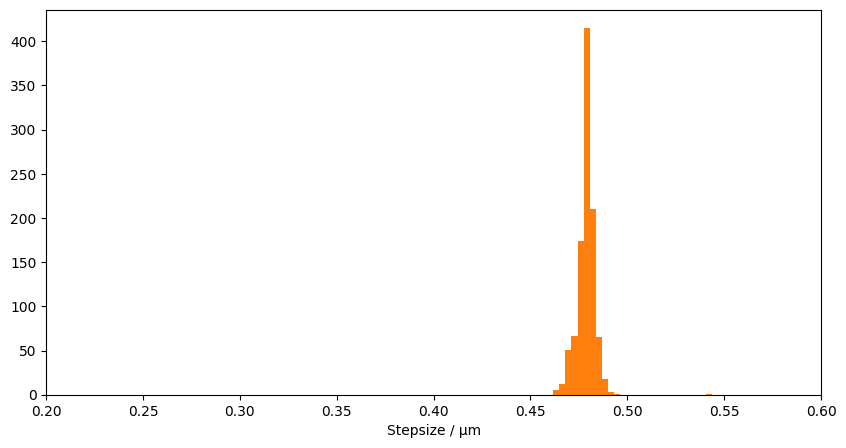

In [10]:
maxis = IFG.reshapeSinglePointFromChannel("M")
IFG.analyseRealSteps(maxis=maxis)

plt.figure(figsize = (10,5))
plt.hist(np.diff(maxis[0,:])*1e6, bins = 300)
plt.hist(np.diff(maxis[0,:])*1e6, bins = 300)
plt.xlim(0.2,0.6)
plt.xlabel("Stepsize / µm")
plt.show()

In [11]:
maxis_orig = IFG.reshapeSinglePointFromChannel("M")
ifg_orig = IFG.reshapeSinglePointFromChannel("O2A")
ifg_interptest, maxis_interptest = IFG.interpolateSingleInterferogram(ifg=ifg_orig,maxis=maxis_orig)

differences = np.zeros((np.shape(maxis_interptest)[0],np.shape(maxis_interptest)[1]-1))
differences_orig = np.zeros((np.shape(maxis_orig)[0],np.shape(maxis_orig)[1]-1))
for i in range(np.shape(maxis_orig)[0]):
    differences[i,:] = np.diff(maxis_interptest[i,:])
    differences_orig[i,:] = np.diff(maxis_orig[i,:])
differences = differences.flatten()

print(f"Average: {np.mean(differences)*1e6} µm")
print(f"Standard deviation: {np.std(differences)*1e6} µm")
print(f"Original Average: {np.mean(differences_orig)*1e6} µm")
print(f"Original Standard deviation: {np.std(differences_orig)*1e6} µm")

Average: 0.47960819159335283 µm
Standard deviation: 4.281968389953685e-14 µm
Original Average: 0.47886212816335394 µm
Original Standard deviation: 0.0094440526470825 µm
